# Introduction
**Market Anomalies** are market patterns that do seem to lead to abnormal returns more often than not, and since some of these patterns are based on information in financial reports, market anomalies present a challenge to the semi-strong form of the efficient market hypothesis, indicating that fundamental analysis does have some value for the individual investor.

# Table of Content:
   
   1. [**Theory**](#1.Theory)<br>
   Stationary vs Non-stationary<br>
   Importance of stationarity<br>
   Transformation of Non-stationary Data<br>
   Quasi-stationary data<br>
   <br>
       
   2. [**Investigation**](#2.Investigation)<br>
   Visual Examination of Stationarity<br>
   Probability Distribution Plot/Function<br>
   Statisatical Examination of Stationarity<br>
   Probability Distribution Models<br>
   Power, Impact and Entry Ratio<br>
   Impact/Power Entry Ratio<br>
   <br>
   
   3. [**Conclusion**](#3.Conclusion)<br>
   
   [**Reference**](#Reference)<br>
   

# 1. Theory <a class="anchor" id="1.Theory"></a>

When financial instruments price data is gathered, it forms a a time series data. These time series need to be analyzed  to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.

In order to perform time series forcasting, first the type of data is investigated. In time series analysis, there are two types of data: 1. Staionary 2. Non-stationary

### Stationary vs Non-stationary

A common assumption in many time series techniques is that the data are stationary.
A stationary process has the property that the mean, variance and autocorrelation structure do not change over time.

Besides visual investigation of flat looking data with constast mean and variance, stationarity can be checked using such as Augmented Dickey-Fuller Test (ADF) and The Priestley-Subba Rao (PSR) Test.
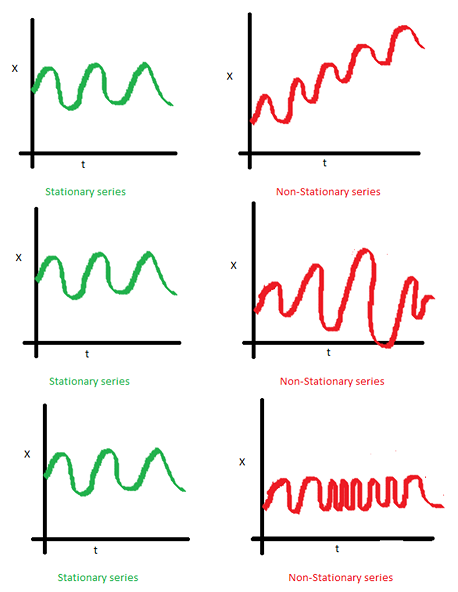

### Importance of stationarity

Non-stationary data, as a rule, are unpredictable and cannot be modeled or forecasted. The results obtained by using non-stationary time series may be spurious in that they may indicate a relationship between two variables where one does not exist. In order to receive consistent, reliable results, the non-stationary data needs to be transformed into stationary data. In contrast to the non-stationary process that has a variable variance and a mean that does not remain near, or returns to a long-run mean over time, the stationary process reverts around a constant long-term mean and has a constant variance independent of time. 

### Why Non-stationary data are unpredictable?
When prediciting the outcome of an experiment, we look at its Probability Distribution Plot/Function(PDF). By using this plot, we assign a probability to its outcome, and we make our prediction based off of it. Usually by using a threshold the probability of any outcome which is over the threshold, becomes our predicted result. Any PDF referes to a distinct experiment and vice versa, meaning if two expermints have different PDFs, it can not be concluded that they are the same and prediction based on one can not be expanded to the other.
Let's have a look at PDF of rolling a single die.
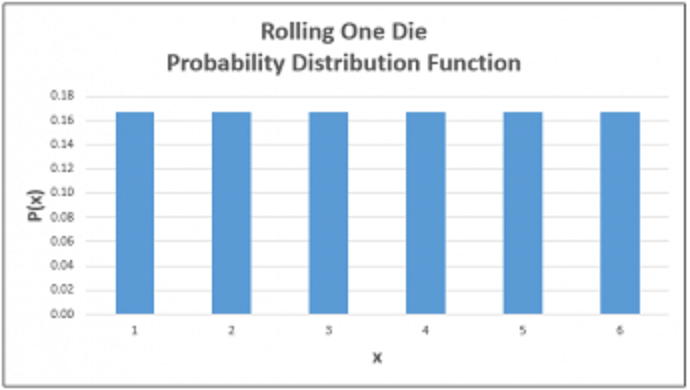
The probability space of this experiment is {1,2,3,4,5,6} and all sides have equal probability. So this pdf represents a unique probability space. And when this plot changes, it's no longer the same space. And any prediciton based on this plot can not be referred to a different probability distribution plot.


### Transformation of Non-stationary Data

When the data is nonstationary, most time series models' assumptions are violated. This leads to the estimators no longer having the nice properties such as asymptotic normality and sometimes even consistency.

If the time series is not stationary, it can often be transformed to stationarity with one of the following techniques.
1. We can difference the data. The differenced data will contain one less point than the original data. Although you can difference the data more than once, one difference is usually sufficient. <br><br>

2. If the data contain a trend, we can fit some type of curve to the data and then model the residuals from that fit. Since the purpose of the fit is to simply remove long term trend, a simple fit, such as a straight line, is typically used. <br><br>

3. For non-constant variance, taking the logarithm or square root of the series may stabilize the variance. For negative data, you can add a suitable constant to make all the data positive before applying the transformation. This constant can then be subtracted from the model to obtain predicted (i.e., the fitted) values and forecasts for future points. <br><br>


### Quasi-stationary data 

Also the transformation of non-stationary improves the stationarity of data, but still it doesn't fully convert it to our desired form. So we define a concept called quasi-stationary data set. In this type of data set, we assume that in the time series, when rolling-window is performed, the ith window will remain stationery with respect to (i-1)th window. In order to specify a metric for this assumption, we apply Gaussian Mixture Model to our data set, and investigate points where this assumption is negated.



# 2. Investigation <a class="anchor" id="2.Investigation"></a>

#### Python Libraries

In [1]:
# Data extraction and manipulation
import pandas as pd
import numpy as np

# Data visualization
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

# Satistical Analysis & Modeling
from statsmodels.tsa.stattools import adfuller
import scipy
import scipy.stats

#### Hyperparameters

In [2]:
# Value in minute to resample 1-min candles to N-min candles
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.resample.html#pandas.Series.resample
Resample = '60T'
# Window size: Number of candles after resampling,e.g. if Resample=60 Window=100,Distribution model takes 60*100 min of data
Window = 50
# PostWindow size: Number of candles after Abnormal occurrence
PostWindow = 25
# Confidence Interval/Alpha - https://en.wikipedia.org/wiki/Confidence_interval
Alpha = 0.95
# Entry Threshold of post events
EntryThreshold = 0.85

#### Getting and/or Storing Data

In [3]:
%%time
########## Read Data ##########
# EURUSD 1min data of 2018- Bid Price source: OANDA
fp = '.\dataset\eur_usd_1min_2018-01-01, 00-00_2018-12-31, 00-00.txt'
# Raw price data
df0_0 = pd.read_csv(fp, index_col="DateTime")
df0_0.index = pd.to_datetime(df0_0.index, format="%Y-%m-%d  %H:%M:%S")
df0_0.head()
# Create series using just Close price
df0_1 = df0_0['Close']

Wall time: 2.29 s


In [4]:
df0_1.head()

DateTime
2018-01-01 22:00:00    1.20041
2018-01-01 22:01:00    1.20038
2018-01-01 22:02:00    1.20043
2018-01-01 22:03:00    1.20042
2018-01-01 22:06:00    1.20038
Name: Close, dtype: float64

In [5]:
df0_0.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 358310 entries, 2018-01-01 22:00:00 to 2018-12-28 21:59:00
Data columns (total 5 columns):
Open      358310 non-null float64
High      358310 non-null float64
Low       358310 non-null float64
Close     358310 non-null float64
Volume    358310 non-null int64
dtypes: float64(4), int64(1)
memory usage: 16.4 MB


### Visual Examination of Stationarity

As mentioned, first we examine the variation of mean and standard deviation to get  a grasp of how data changes. So the Bid Close price of 1min candle data is selected to find the variation of  these two metrics on a monthly basis.

#### Mean, STD, and Autocoorelation over time

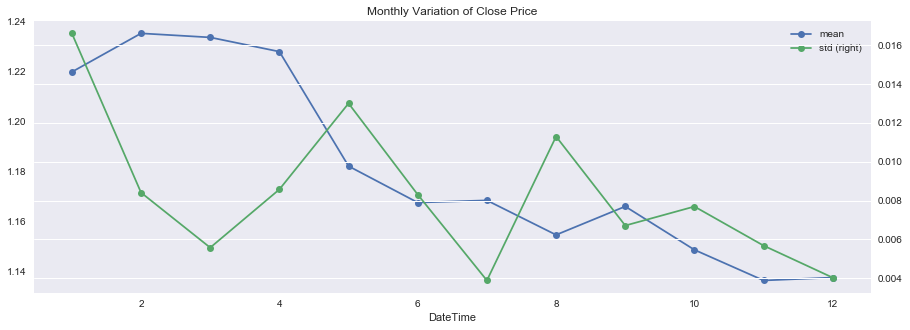

In [6]:
ax1 = df0_1.groupby(df0_0.index.month).agg(["mean", "std"]).plot(subplots=False,marker='o',
                                                                 secondary_y='std',
                                                                 figsize=(15,5), title="Monthly Variation of Close Price")

As it's shown, mean and STD vary over time, indicating data is non-stationary.<br>
One of the characteristics of stationary data is consistency in Autocorrelation structure. Next, we plot Monthly Autocorrelation to investigate its pattern.

Wall time: 12.5 s


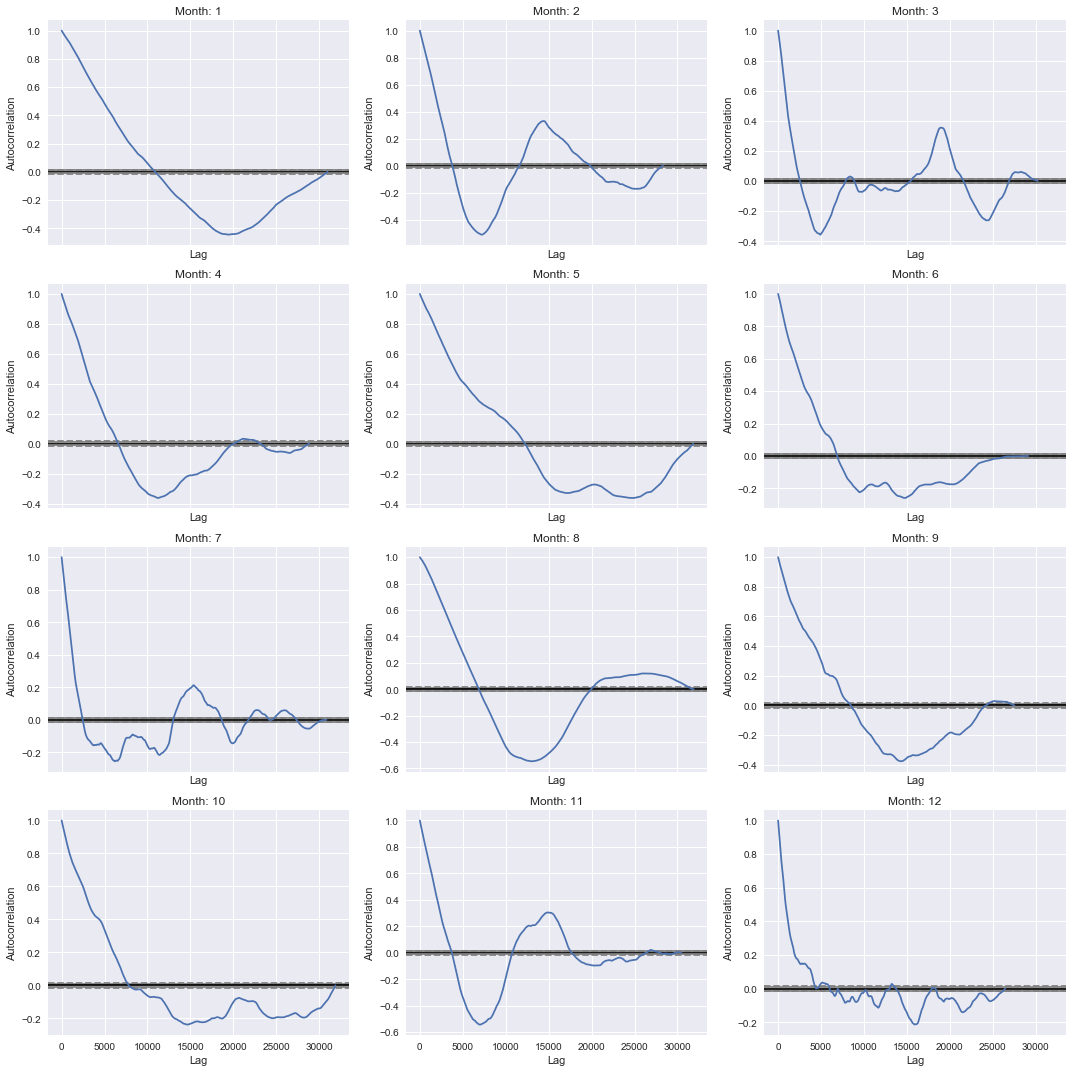

In [7]:
%%time

_, axes = plt.subplots(4, 3, figsize=(15,15), sharex=True)
for month in df0_1.index.month.unique():
    ax=axes[int((month-1)/3),(month-1)%3]
    autocorrelation_plot(df0_1[df0_1.index.month==month], ax=ax)
    ax.set_title(f"Month: {month}")
    ax.grid()
plt.tight_layout()

As expected Autocorrelation did not show structural consistency.<br>
Now, we use first method of transformation to improve stationarity of data. We calculate Return, which is a discrete differentiation.
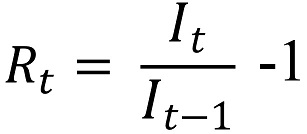
It: current close price<br>
I(t-1): previous close price

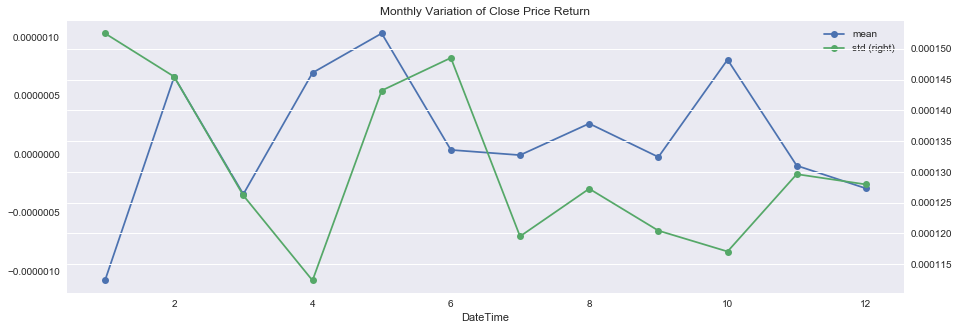

In [8]:
df0_2 = (df0_1/df0_1.shift(-1)-1).dropna()
df0_2.name= 'Close Return'

ax2 = df0_2.groupby(df0_2.index.month).agg(["mean",
                                            "std"]).plot(subplots=False,marker='o',
                                                         secondary_y='std',
                                                         figsize=(15,5),
                                                         title="Monthly Variation of Close Price Return")

Wall time: 12.8 s


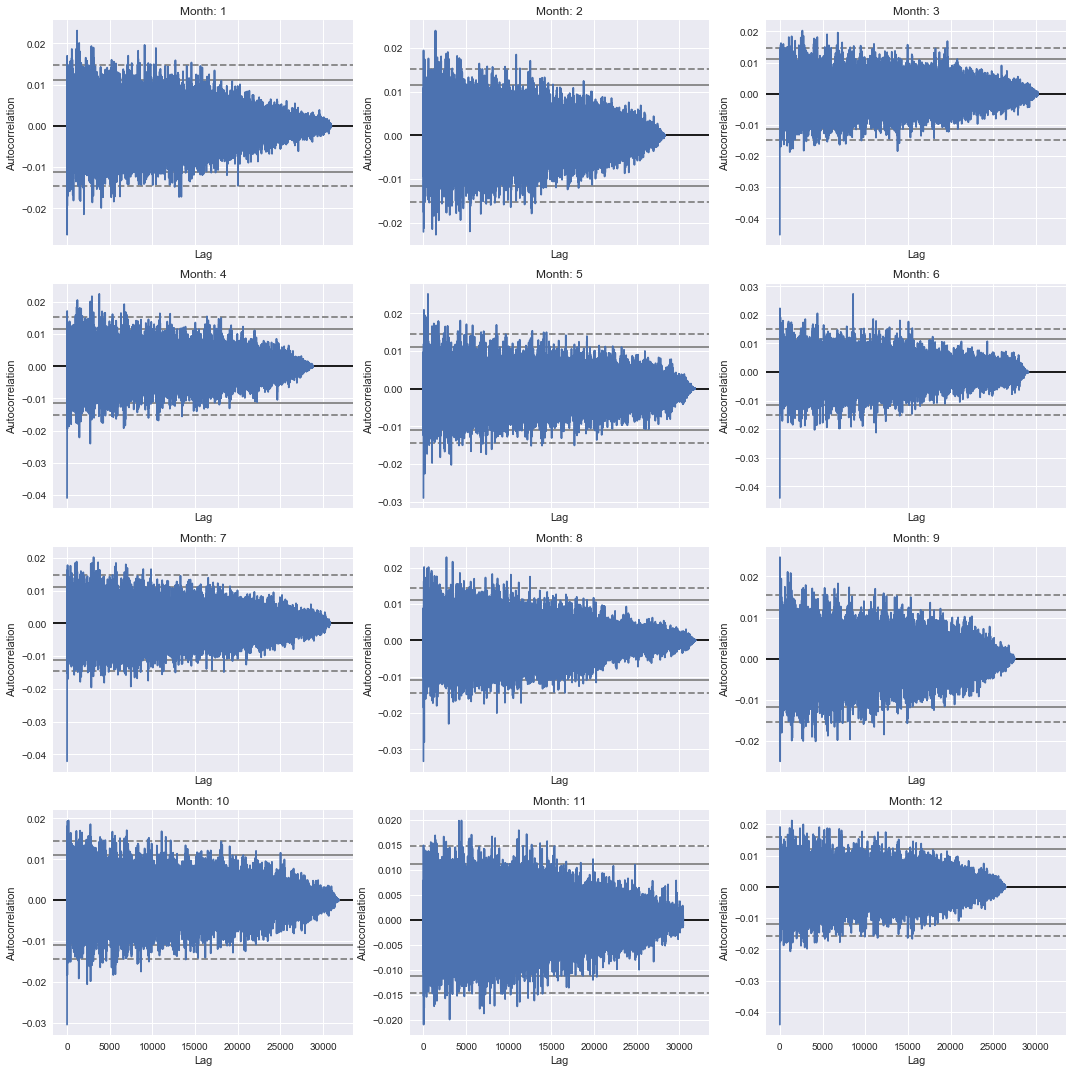

In [9]:
%%time

_, axes = plt.subplots(4, 3, figsize=(15,15), sharex=True)
for month in df0_2.index.month.unique():
    ax=axes[int((month-1)/3),(month-1)%3]
    autocorrelation_plot(df0_2[df0_2.index.month==month], ax=ax)
    ax.set_title(f"Month: {month}")
    ax.grid()
plt.tight_layout()

In Return plots, it's clear that compared to close price plots, variation of mean and std have reduced. Also Autocorrelation has fallen into a very low range with high noise.

### Probability Distribution Plot/Function

                                      Monthly Probability Distribution of Close Price


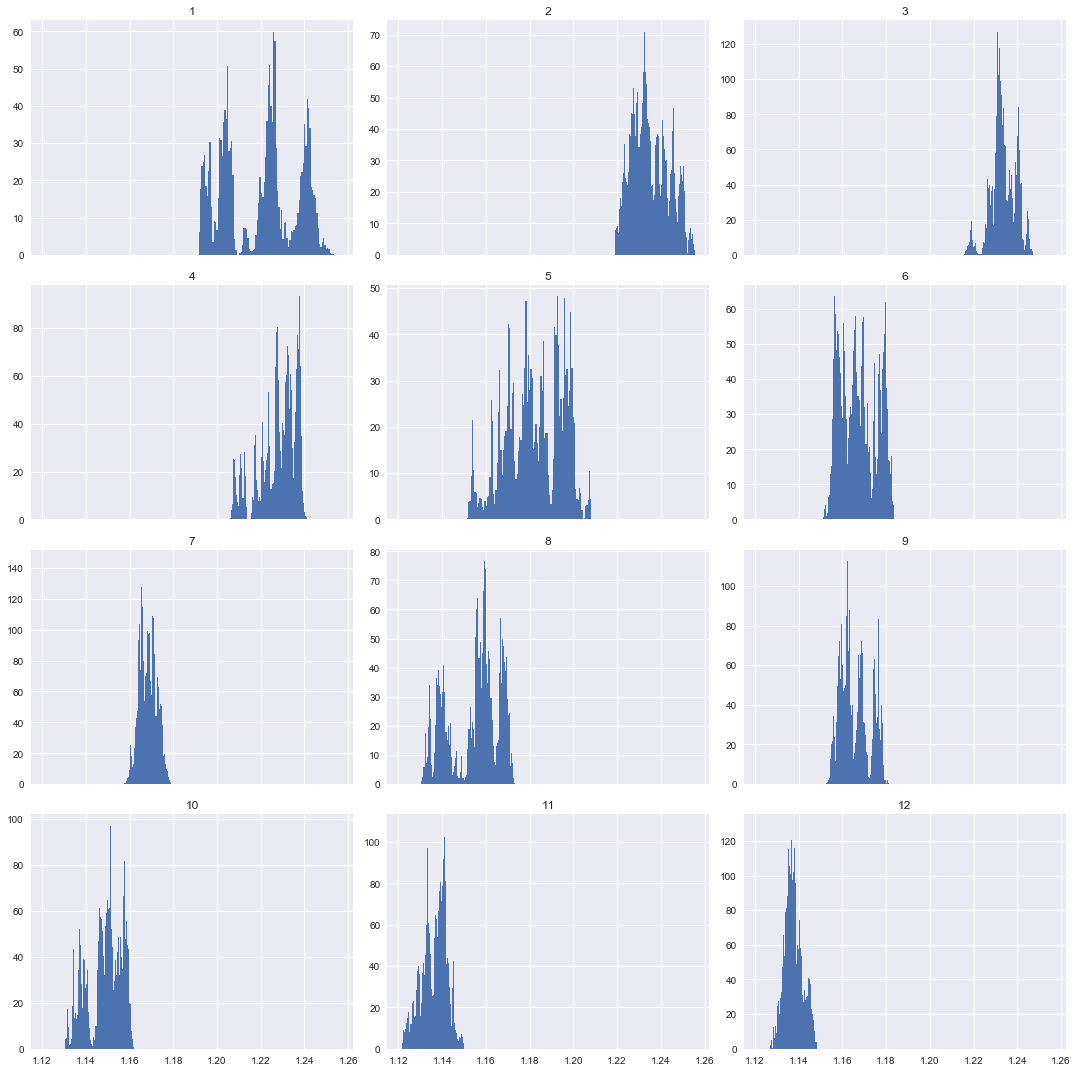

In [10]:
tmp=df0_1.to_frame().assign(month=df0_1.index.month,
                       ).pivot(columns='month',values='Close',
                              ).apply(lambda x: pd.Series(x.dropna().values)).reset_index(drop=True)
ax3 = tmp.hist(figsize=(15,15), bins=100, sharex=True, density=True)
print('                                      Monthly Probability Distribution of Close Price')
plt.tight_layout()

                                      Monthly Probability Distribution of Close Price Return


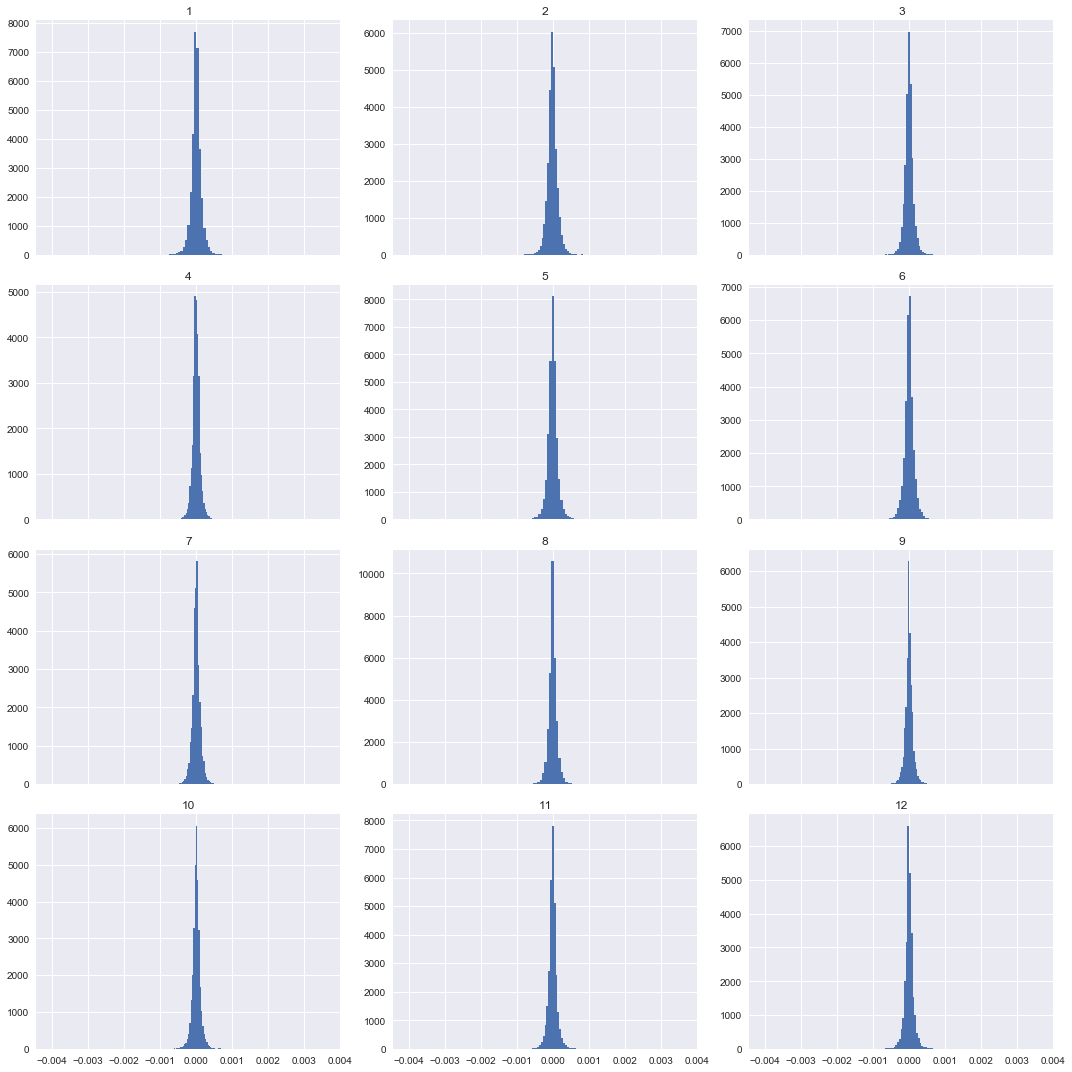

In [11]:
tmp=df0_2.to_frame().assign(month=df0_2.index.month,
                       ).pivot(columns='month',values='Close Return',
                              ).apply(lambda x: pd.Series(x.dropna().values)).reset_index(drop=True)
ax4 = tmp.hist(figsize=(15,15), bins=100, sharex=True)
print('                                      Monthly Probability Distribution of Close Price Return')
plt.tight_layout()

By looking at PDF of price and return, it becomes clear as why to use Return data instead of price.
Price data is a Multimodal distribution, which makes fitting a function to it a complex task. At the other hand Return PDF is Unimodal, and most statistical models work with these kind of distributions.

### Statisatical Examination of Stationarity

The **Dickey Fuller Test** is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test are:

**Null Hypothesis**: The series has a unit root (value of a =1)

**Alternate Hypothesis**: The series has no unit root.

If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary.

**Test for stationarity**: If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary). When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary).

In [12]:
#define function for ADF test
def adf_test(timeseries):
    # Perform Dickey-Fuller test:
    # https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html
    dftest = adfuller(timeseries, autolag=None)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    dfoutput['Stationarity'] = dfoutput['Test Statistic']<dfoutput.iloc[4]
    return dfoutput.to_dict()

In [13]:
#apply adf on the series on close price data
tmp = df0_1.groupby(df0_1.index.month).agg(adf_test)
test_df0_1=pd.DataFrame()
test_df0_1['Test Statistic']= tmp.apply(lambda x:x['Test Statistic'])
test_df0_1['p-value']= tmp.apply(lambda x:x['p-value'])
test_df0_1['#Lags Used']= tmp.apply(lambda x:x['#Lags Used'])
test_df0_1['Number of Observations Used']= tmp.apply(lambda x:x['Number of Observations Used'])
test_df0_1['Critical Value (1%)']= tmp.apply(lambda x:x['Critical Value (1%)'])
test_df0_1['Critical Value (5%)']= tmp.apply(lambda x:x['Critical Value (5%)'])
test_df0_1['Critical Value (10%)']= tmp.apply(lambda x:x['Critical Value (10%)'])
test_df0_1['Stationarity']= tmp.apply(lambda x:x['Stationarity'])
test_df0_1['Stationarity'] = test_df0_1['Stationarity'].apply(lambda x: bool(x))

In [14]:
#apply adf on the series on close price return data
tmp = df0_2.groupby(df0_2.index.month).agg(adf_test)
test_df0_2=pd.DataFrame()
test_df0_2['Test Statistic']= tmp.apply(lambda x:x['Test Statistic'])
test_df0_2['p-value']= tmp.apply(lambda x:x['p-value'])
test_df0_2['#Lags Used']= tmp.apply(lambda x:x['#Lags Used'])
test_df0_2['Number of Observations Used']= tmp.apply(lambda x:x['Number of Observations Used'])
test_df0_2['Critical Value (1%)']= tmp.apply(lambda x:x['Critical Value (1%)'])
test_df0_2['Critical Value (5%)']= tmp.apply(lambda x:x['Critical Value (5%)'])
test_df0_2['Critical Value (10%)']= tmp.apply(lambda x:x['Critical Value (10%)'])
test_df0_2['Stationarity']= tmp.apply(lambda x:x['Stationarity'])
test_df0_2['Stationarity'] = test_df0_2['Stationarity'].apply(lambda x: bool(x))

In [15]:
print('                                 Augmented Dickey–Fuller test (ADF) on Close Price')
test_df0_1

                                 Augmented Dickey–Fuller test (ADF) on Close Price


,Test Statistic,p-value,#Lags Used,Number of Observations Used,Critical Value (1%),Critical Value (5%),Critical Value (10%),Stationarity
DateTime,,,,,,,,
1,-0.783946,0.823792,51.0,30920.0,-3.430562,-2.861633,-2.566820,False
2,-1.272927,0.641465,50.0,28247.0,-3.430582,-2.861642,-2.566824,False
3,-3.117997,0.025250,51.0,30184.0,-3.430567,-2.861636,-2.566821,False
4,-0.180836,0.940768,50.0,28756.0,-3.430577,-2.861641,-2.566824,False
5,-1.761932,0.399518,51.0,31789.0,-3.430556,-2.861631,-2.566818,False
6,-1.628316,0.468372,50.0,29074.0,-3.430575,-2.861639,-2.566823,False
7,-2.863859,0.049715,51.0,30794.0,-3.430562,-2.861634,-2.566820,False
8,-1.373654,0.594840,51.0,31838.0,-3.430555,-2.861631,-2.566818,False
9,-1.591628,0.487798,49.0,27472.0,-3.430588,-2.861645,-2.566826,False


In [16]:
print('                                 Augmented Dickey–Fuller test (ADF) on Close Price Return')
test_df0_2

                                 Augmented Dickey–Fuller test (ADF) on Close Price Return


,Test Statistic,p-value,#Lags Used,Number of Observations Used,Critical Value (1%),Critical Value (5%),Critical Value (10%),Stationarity
DateTime,,,,,,,,
1,-25.010971,0.0,51.0,30920.0,-3.430562,-2.861633,-2.566820,True
2,-22.927381,0.0,50.0,28247.0,-3.430582,-2.861642,-2.566824,True
3,-22.898368,0.0,51.0,30184.0,-3.430567,-2.861636,-2.566821,True
4,-24.504236,0.0,50.0,28756.0,-3.430577,-2.861641,-2.566824,True
5,-25.479798,0.0,51.0,31789.0,-3.430556,-2.861631,-2.566818,True
6,-24.342416,0.0,50.0,29074.0,-3.430575,-2.861639,-2.566823,True
7,-23.883793,0.0,51.0,30794.0,-3.430562,-2.861634,-2.566820,True
8,-24.750172,0.0,51.0,31838.0,-3.430555,-2.861631,-2.566818,True
9,-24.457765,0.0,49.0,27472.0,-3.430588,-2.861645,-2.566826,True


### Probability Distribution Models

In this section, the concept of quasi-stationary is further explored. 
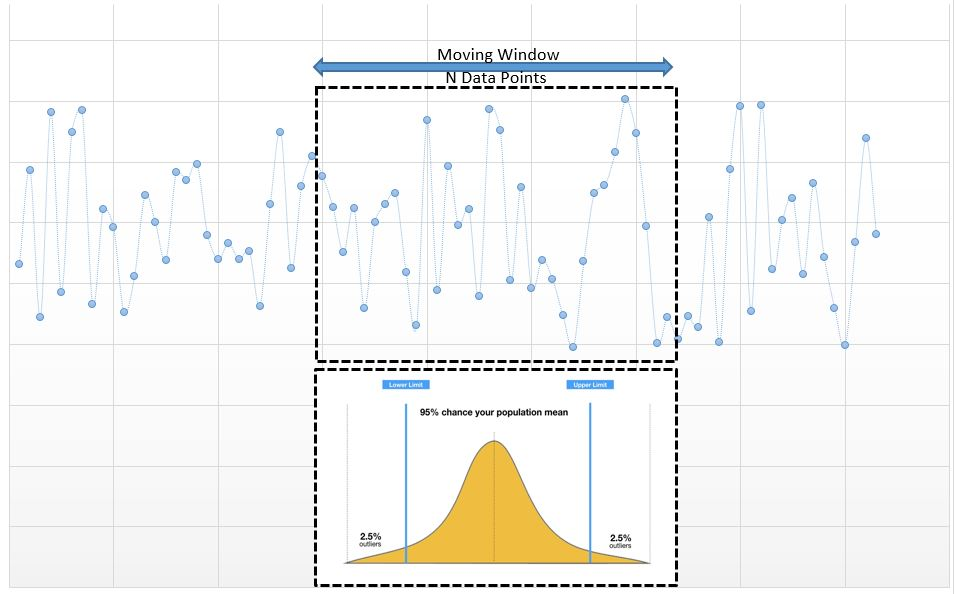
First a rolling window is defined, using this window data, a PDF, i.e. Gaussianm is fitted to the data. A confidence interval as a hyperparameter is specified to find the upper and lower limits of this distribution.<br>
We work with the assumption that every immediate next data point falls within the range of this interval, and every time it doesn't, it's an **Abnormal Return**.


In [17]:
# Resample Close Price data using resample parameter
df0_3_ = df0_1.resample(Resample).last().dropna()
# Close Price Return data using
df0_3 = ((df0_3_/df0_3_.shift(-1))-1).dropna()
df0_3.name= 'Close Return'

#### Kolmogorov–Smirnov Test 
The k-s test returns a D statistic and a p-value corresponding to the D statistic. The D statistic is the absolute max distance (supremum) between the CDFs of the two samples. The closer this number is to 0 the more likely it is that the two samples were drawn from the same distribution. 

**Null Hypothesis**: Two distributions are identical, if the p-value is above defined significance level.

In [18]:
# Class to create distribution function, calculate confidence interval and perform k-s test.
class Distribution(object):
    
    def __init__(self,dist_names_list = ['cauchy']):
        self.dist_names = dist_names_list
        self.dist_results = []
        self.params = {}
        # defined significance level for k-s test, values below it rejects null hypothesis
        self.p_value_threshold=0.05
        
        self.DistributionName = ""
        self.PValue = 0
        self.Param = None
        
        self.isFitted = False
             
    def Fit(self, y, *args):
        mode = args[0]
        alpha = args[1]
        self.dist_results = []
        self.params = {}
        for dist_name in self.dist_names:
            dist = getattr(scipy.stats, dist_name)
            param = dist.fit(y)
            
            self.params[dist_name] = param
            #Applying the Kolmogorov-Smirnov test
            D, p = scipy.stats.kstest(y, dist_name, args=param);
            ci = dist.interval(alpha, loc=np.mean(y), scale=np.std(y))
            self.dist_results.append((dist_name,p,ci))

        #select the best fitted distribution
        sel_dist,p,ci = (max(self.dist_results,key=lambda item:item[1]))
        #store the name of the best fit and its p value
        self.DistributionName = sel_dist
        self.PValue = p>self.p_value_threshold
        self.ci = ci
        
        self.isFitted = True
        if mode==None:
            return self.DistributionName,self.PValue,self.ci
        elif mode==0:
            return self.DistributionName
        elif mode==1:
            #p_value of ks_test
            return self.PValue
        elif mode==2:
            #ci_low
            return self.ci[0]
        elif mode==3:
            #ci_high
            return self.ci[1]

In [19]:
%%time

df0_4 = df0_3.to_frame()
Dist=Distribution(['laplace'])
df0_4['ks_test']=df0_4['Close Return'].rolling(Window).apply(Dist.Fit, raw=True, args=[1, Alpha])
df0_4['ks_test'] = df0_4['ks_test'].apply(lambda x: bool(x))
df0_4['ci_lower']=df0_4['Close Return'].rolling(Window).apply(Dist.Fit, raw=True, args=[2, Alpha])
df0_4['ci_upper']=df0_4['Close Return'].rolling(Window).apply(Dist.Fit, raw=True, args=[3, Alpha])
df0_4.dropna(inplace=True)
df0_4['Abnormal Return'] = (df0_4['ci_lower']>df0_4['Close Return'].shift(1)) | (df0_4['ci_upper']<df0_4['Close Return'].shift(1))

Wall time: 53.2 s


Now we check, how many times the Null Hypothesis of K-S test been rejected.

In [20]:
# Count where ks-test is rejected
print (f'K-S Test Rejected: {df0_4[df0_4["ks_test"]==False]["ks_test"].count()} out of {len(df0_4)}')

K-S Test Rejected: 0 out of 6142


So **Laplace** distribution model is a reasonable estimate.

In [21]:
df0_4[df0_4['Abnormal Return']==True].head()

,Close Return,ks_test,ci_lower,ci_upper,Abnormal Return
DateTime,,,,,
2018-01-10 10:00:00,-0.000908,True,-0.002726,0.002673,True
2018-01-11 12:00:00,-0.002244,True,-0.003719,0.003375,True
2018-01-21 22:00:00,0.000228,True,-0.003018,0.002780,True
2018-01-25 13:00:00,0.000609,True,-0.004661,0.003887,True
2018-01-25 19:00:00,-0.001298,True,-0.005626,0.005223,True


### Power, Impact and Entry Ratio

The quasi-stationary assumption provides trading opportunities. These abnoraml/anomaly returns can be considered **EntryPoints**. For the purpose of this investigation, we are considered with the direction of price return after these outliners, we only are considered whether the model provides a good Entry Point or not.<br>
In order to analyze the performance of an EntryPoint model, we define following parameters.

\begin{equation*}
EventReturn = \frac{P-P_E}{P_E}
\end{equation*}
 *$P_{E}$: Close price at Event*<br>
 *$P$: Close price*<br>
 
\begin{equation*}
BullPower = \frac{\sum_{EventReturn>0} EventReturn}{\sum |EventReturn|}
\end{equation*}

\begin{equation*}
BearPower = \frac{\sum_{EventReturn<0} |EventReturn|}{\sum |EventReturn|}
\end{equation*}

<br><br>
\begin{equation*}
BullImpact = \frac{Count(EventReturn>0)}{Count(EventReturn)}
\end{equation*}

\begin{equation*}
BearImpact = \frac{Count(EventReturn<0)}{Count(EventReturn)}
\end{equation*}


In [22]:
df0_5 = df0_4.merge(df0_3_.to_frame(), left_index=True, right_index=True)
AbnormalEvents = df0_5[df0_5['Abnormal Return']==True].index
df0_5['Bull_Power'] = 0
df0_5['Bear_Power'] = 0
df0_5['Bull_Impact'] = 0
df0_5['Bear_Impact'] = 0

In [23]:
%%time

for AE in AbnormalEvents:
    tmp1= df0_5.loc[AE:].head(PostWindow+1)['Close']
    tmp2=df0_5.loc[AE].head(PostWindow+1)['Close']
    tmp3 = (tmp1-tmp2)/tmp2

    df0_5['Bull_Power'].loc[AE]=tmp3[tmp3>0].sum()/(abs(tmp3).sum())
    df0_5['Bear_Power'].loc[AE]=abs(tmp3[tmp3<0]).sum()/(abs(tmp3).sum())

    df0_5['Bull_Impact'].loc[AE]=tmp3[tmp3>0].count()/(abs(tmp3).count())
    df0_5['Bear_Impact'].loc[AE]=abs(tmp3[tmp3<0]).count()/(abs(tmp3).count())


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Wall time: 30.2 s


#### Example of Bull/Bear Power and Impact
As an example, we plot the data for one of the anomalies.

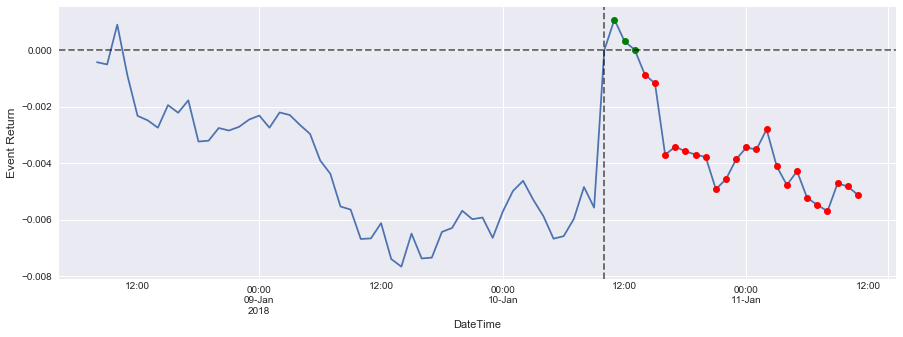

In [24]:
Event = AbnormalEvents[0]
Index = df0_5.index.get_loc(Event)

df0_5_example = df0_5.iloc[Index-Window:Index+PostWindow+1]
tmp1=(df0_5_example['Close']-df0_5_example.loc[Event]['Close'])/1

ax1 = tmp1.plot(figsize=(15, 5))
try:
    tmp1[(tmp1.index>Event) & (tmp1>0)].plot(style='go', ax=ax1, markersize=7)
except:
    pass
try:
    tmp1[(tmp1.index>Event) & (tmp1<0)].plot(style='ro', ax=ax1, markersize=7)
except:
    pass

ax1.axvline(Event, color='black', alpha=0.6, linestyle='--')
ax1.axhline(0, color='black', alpha=0.6, linestyle='--')
ax1.set_ylabel('Event Return', fontsize=12)
plt.show()

As depicted in the plot, the sum of all red points divided by the sum of all green and red points combined is BearPower. And its count is BearImpact. The same can be applied to BullPower and BullImpact.

### Impact/Power Entry Ratio

To sum up our study on abnormal returns, we define two other parameters which summarize the Bull Power and Impact. They are defind as following:

\begin{equation*}
ImpactEntryRatio = \frac{Count(BullImpact>=EntryThreshold \;\;|\;\; BearImpact>=EntryThreshold)}{count(All\;Impacts)}
\end{equation*}

\begin{equation*}
PowerEntryRatio = \frac{Count(BullPower>=EntryThreshold \;\;|\;\; BearPower>=EntryThreshold)}{count(All\;Powers)}
\end{equation*}


In [25]:
tmp1 = df0_5[df0_5['Abnormal Return']==True].Bull_Power
tmp2 = df0_5[df0_5['Abnormal Return']==True].Bull_Impact

tmp3 = df0_5[df0_5['Abnormal Return']==True].Bear_Power
tmp4 = df0_5[df0_5['Abnormal Return']==True].Bear_Impact
EntryThreshold
PowerEntryRatio = ((tmp1 >= EntryThreshold) | (tmp3 >= EntryThreshold)).sum()/len(tmp1)
ImpactEntryRatio = ((tmp2 >= EntryThreshold) | (tmp4 >= EntryThreshold)).sum()/len(tmp2)

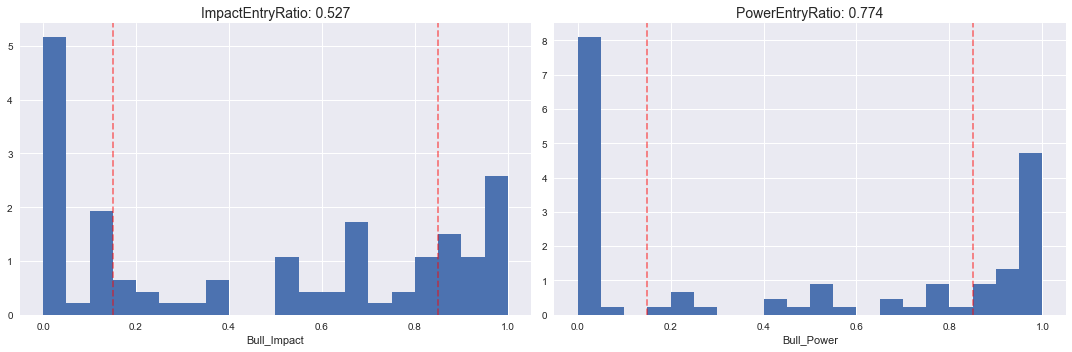

In [26]:
bins=np.arange(0,1.05,0.05)

ax5 = df0_5[df0_5['Abnormal Return']==True][['Bull_Power', 'Bull_Impact']].hist(bins=bins, figsize=(15,5), density=True)

ax5[0][0].axvline(EntryThreshold, color='red', alpha=0.5, linestyle='--')
ax5[0][0].axvline(1-EntryThreshold, color='red', alpha=0.5, linestyle='--')
ax5[0][0].set_title(f'ImpactEntryRatio: {round(ImpactEntryRatio,3)}', fontsize=14)
ax5[0][0].set_xlabel("Bull_Impact")

ax5[0][1].axvline(EntryThreshold, color='red', alpha=0.5, linestyle='--')
ax5[0][1].axvline(1-EntryThreshold, color='red', alpha=0.5, linestyle='--')
ax5[0][1].set_title(f'PowerEntryRatio: {round(PowerEntryRatio,3)}', fontsize=14)
ax5[0][1].set_xlabel("Bull_Power")

plt.tight_layout()

A high Power Entry Ratio indicates that abnormality detection algorithm has performed well, meaning the trading opportunities identified by the model are worth investigating. 

# 3. Conclusion <a class="anchor" id="3.Conclusion"></a>

In this study using a moving distribution model, we found anomalies in the return data. Then we defined a Power and Impact metrics to rate our anomalies. In order to filter out good Entry models from bad ones, we introduce Entry Ratios which can be employed for future investigation. In the future study, we can use the result of this research for an event study.

# Reference <a class="anchor" id="Reference"></a>

    1. http://www.mathwave.com/articles/distribution-fitting-goodness-of-fit.html
    2. https://people.maths.bris.ac.uk/~magpn/Research/LSTS/TOS.html
    3. https://www.quantopian.com/posts/research-looking-for-drift-an-event-study-with-share-buybacks-announcements
    4. https://en.wikipedia.org/wiki/Abnormal_return